In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat

In [4]:
filenames = ['df_t0_ratio.csv','df_t0_ratio_repeat.csv','df_t0_ratio_repeat2.csv', 'df_t30_ratio.csv',
             'df_t60_ratio.csv','df_t90_ratio_repeat.csv', 'df_t120_ratio.csv']
# Create list of filenames to be read

dataframes = [pd.read_csv(file) for file in filenames]
# Use list comprehension to generate list of read dataframes

df_mean = dataframes[0][['Condition', 'Mean Ratio']]
# Create the an initial dataframe by taking the slug identity and and '0' columns of the t0 data.


for file in dataframes[1:]:
        df_mean = pd.concat([df_mean, file['Mean Ratio']],
                       axis=1, ignore_index=True)
# Concatenate subsequent dataframe's 'Averaged Vinyl Divide Aromatic' column along the columns axis and ignore the index.
        
col_names = {0:'Condition',
            1:'t0_mean',
            2:'t0_mean_repeat',
            3:'t0_mean_repeat2',
            4:'t30_mean',
            5:'t60_mean',
            6:'t90_mean_repeat',
            7:'t120_mean'}
df_mean.rename(columns=col_names, inplace=True)
# Rename columns

df_mean
# Check df_mean

,Condition,t0_mean,t0_mean_repeat,t0_mean_repeat2,t30_mean,t60_mean,t90_mean_repeat,t120_mean
0,1_Repeat,1.127922,0.877288,1.052586,0.863129,0.829034,0.634889,0.838785
1,1_Repeat_2,1.059885,1.078515,1.087365,0.914474,0.857665,0.764616,0.808676
2,1_Repeat_3,1.058157,1.150951,1.144195,0.948170,0.862727,0.802219,0.823516
3,19_Repeat,1.083874,1.101088,1.074120,0.978315,0.915803,0.877109,0.892403
4,19_Repeat_1,1.059439,1.108232,1.100182,0.995882,0.910912,0.865360,0.880225
5,19_Repeat_2,1.102771,1.118660,1.101882,0.986114,0.933125,0.848077,0.900092
6,10_Repeat,3.200406,3.745566,3.159218,2.704576,2.714750,2.402749,2.497818
7,10_Repeat_2,3.883494,3.855719,3.922902,3.192331,2.901962,2.504733,2.810920
8,10_Repeat_3,3.891328,3.876112,3.793766,3.244634,2.858168,2.506345,2.794369


In [6]:
df_std = dataframes[0][['Condition', 'Standard Deviation']]

for file in dataframes[1:]:
        df_std = pd.concat([df_std, file['Standard Deviation']], axis=1, ignore_index=True)
        
col_names = {0:'Condition',
            1:'t0_std',
            2:'t0_std_repeat',
            3:'t0_std_repeat2',
            4:'t30_std',
            5:'t60_std',
            6:'t90_std_repeat',
            7:'t120_std'}
df_std.rename(columns=col_names, inplace=True)
# Rename columns

df_std
# Check df_std

,Condition,t0_std,t0_std_repeat,t0_std_repeat2,t30_std,t60_std,t90_std_repeat,t120_std
0,1_Repeat,0.020236,0.019308,0.016408,0.024782,0.018827,0.026287,0.027156
1,1_Repeat_2,0.006376,0.022655,0.016164,0.037369,0.018936,0.026653,0.018351
2,1_Repeat_3,0.016721,0.013605,0.015984,0.028047,0.032179,0.033983,0.017444
3,19_Repeat,0.014566,0.036556,0.026043,0.025758,0.018211,0.028323,0.015199
4,19_Repeat_1,0.015179,0.020525,0.015717,0.018712,0.017553,0.019387,0.013401
5,19_Repeat_2,0.015267,0.011231,0.012215,0.025276,0.031323,0.026492,0.015707
6,10_Repeat,0.049204,0.076508,0.083483,0.268592,0.060199,0.061829,0.050011
7,10_Repeat_2,0.071818,0.045501,0.097647,0.080098,0.061876,0.070596,0.056364
8,10_Repeat_3,0.056561,0.055399,0.058020,0.078466,0.065777,0.055400,0.064624


In [14]:
# Express the Mean and Std of the Ratios and append them in a list.
l_t0=[]
for i in range(0,9):
    l_t0.append(ufloat(df_mean.loc[i, 't0_mean'], df_std.loc[i, 't0_std']))
 
l_t0_repeat=[]
for i in range(0,9):
    l_t0_repeat.append(ufloat(df_mean.loc[i, 't0_mean_repeat'], df_std.loc[i, 't0_std_repeat']))

l_t0_repeat2=[]
for i in range(0,9):
    l_t0_repeat2.append(ufloat(df_mean.loc[i, 't0_mean_repeat2'], df_std.loc[i, 't0_std_repeat2']))    

l_t30=[]
for i in range(0,9):
    l_t30.append(ufloat(df_mean.loc[i, 't30_mean'], df_std.loc[i, 't30_std']))

l_t60=[]
for i in range(0,9):
    l_t60.append(ufloat(df_mean.loc[i, 't60_mean'], df_std.loc[i, 't60_std']))

l_t90_repeat=[]
for i in range(0,9):
    l_t90_repeat.append(ufloat(df_mean.loc[i, 't90_mean_repeat'], df_std.loc[i, 't90_std_repeat']))

l_t120=[]
for i in range(0,9):
    l_t120.append(ufloat(df_mean.loc[i, 't120_mean'], df_std.loc[i, 't120_std']))
    
df_ufloat = pd.DataFrame([l_t0, l_t0_repeat, l_t0_repeat2, l_t30, l_t60, l_t90_repeat, l_t120]).T
df_ufloat.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_ufloat.rename({1: '0_repeat', 2:'0_repeat2', 3:30, 4:60, 5:'90_repeat', 6:120},
                 inplace=True, axis=1)
df_ufloat

,Condition,0,0_repeat,0_repeat2,30,60,90_repeat,120
0,1_Repeat,1.128+/-0.020,0.877+/-0.019,1.053+/-0.016,0.863+/-0.025,0.829+/-0.019,0.635+/-0.026,0.839+/-0.027
1,1_Repeat_2,1.060+/-0.006,1.079+/-0.023,1.087+/-0.016,0.91+/-0.04,0.858+/-0.019,0.765+/-0.027,0.809+/-0.018
2,1_Repeat_3,1.058+/-0.017,1.151+/-0.014,1.144+/-0.016,0.948+/-0.028,0.863+/-0.032,0.802+/-0.034,0.824+/-0.017
3,19_Repeat,1.084+/-0.015,1.10+/-0.04,1.074+/-0.026,0.978+/-0.026,0.916+/-0.018,0.877+/-0.028,0.892+/-0.015
4,19_Repeat_1,1.059+/-0.015,1.108+/-0.021,1.100+/-0.016,0.996+/-0.019,0.911+/-0.018,0.865+/-0.019,0.880+/-0.013
5,19_Repeat_2,1.103+/-0.015,1.119+/-0.011,1.102+/-0.012,0.986+/-0.025,0.933+/-0.031,0.848+/-0.026,0.900+/-0.016
6,10_Repeat,3.20+/-0.05,3.75+/-0.08,3.16+/-0.08,2.70+/-0.27,2.71+/-0.06,2.40+/-0.06,2.50+/-0.05
7,10_Repeat_2,3.88+/-0.07,3.86+/-0.05,3.92+/-0.10,3.19+/-0.08,2.90+/-0.06,2.50+/-0.07,2.81+/-0.06
8,10_Repeat_3,3.89+/-0.06,3.88+/-0.06,3.79+/-0.06,3.24+/-0.08,2.86+/-0.07,2.51+/-0.06,2.79+/-0.06


In [15]:
# Create Conversion and Propagated Standard Deviation DataFrame

df_conversion = pd.DataFrame()
df_conversion = pd.concat([df_conversion, df_mean['Condition']], axis=1)

df_conversion[0] = ((1 - (df_mean.iloc[:,1]/ df_mean.iloc[:,1]))*100)

df_conversion[30] = ((1 - (df_mean.iloc[:,4]/ df_mean.iloc[:,1]))*100)

df_conversion[60] = ((1 - (df_mean.iloc[:,5]/ df_mean.iloc[:,1]))*100)

df_conversion[90] = ((1 - (df_mean.iloc[:,6]/ df_mean.iloc[:,3]))*100)

df_conversion[120] = ((1 - (df_mean.iloc[:,7]/ df_mean.iloc[:,2]))*100)

df_conversion

,Condition,0,30,60,90,120
0,1_Repeat,0.0,23.476121,26.498987,39.682914,4.388899
1,1_Repeat_2,0.0,13.719485,19.079392,29.681723,25.019431
2,1_Repeat_3,0.0,10.394182,18.468858,29.887858,28.449042
3,19_Repeat,0.0,9.739055,15.506480,18.341600,18.952688
4,19_Repeat_1,0.0,5.999064,14.019366,21.343914,20.573972
5,19_Repeat_2,0.0,10.578526,15.383611,23.033772,19.538408
6,10_Repeat,0.0,15.492703,15.174812,23.944832,33.312675
7,10_Repeat_2,0.0,17.797435,25.274441,36.151000,27.097373
8,10_Repeat_3,0.0,16.618860,26.550335,33.935164,27.907939


In [16]:
df_errorprop = pd.DataFrame()
df_errorprop = pd.concat([df_errorprop, df_ufloat['Condition']], axis=1)

df_errorprop[0] = ((1 - (df_ufloat.iloc[:,1]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[30] = ((1 - (df_ufloat.iloc[:,4]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[60] = ((1 - (df_ufloat.iloc[:,5]/ df_ufloat.iloc[:,1]))*100)

df_errorprop[90] = ((1 - (df_ufloat.iloc[:,6]/ df_ufloat.iloc[:,3]))*100)

df_errorprop[120] = ((1 - (df_ufloat.iloc[:,7]/ df_ufloat.iloc[:,2]))*100)

df_errorprop

,Condition,0,30,60,90,120
0,1_Repeat,0.0+/-0,23.5+/-2.6,26.5+/-2.1,39.7+/-2.7,4+/-4
1,1_Repeat_2,0.0+/-0,14+/-4,19.1+/-1.9,29.7+/-2.7,25.0+/-2.3
2,1_Repeat_3,0.0+/-0,10.4+/-3.0,18.5+/-3.3,29.9+/-3.1,28.4+/-1.7
3,19_Repeat,(0.0+/-2.1)e-16,9.7+/-2.7,15.5+/-2.0,18.3+/-3.3,19.0+/-3.0
4,19_Repeat_1,(0.0+/-2.2)e-16,6.0+/-2.2,14.0+/-2.1,21.3+/-2.1,20.6+/-1.9
5,19_Repeat_2,(0.0+/-2.2)e-16,10.6+/-2.6,15.4+/-3.1,23.0+/-2.6,19.5+/-1.6
6,10_Repeat,0.0+/-0,15+/-8,15.2+/-2.3,23.9+/-2.8,33.3+/-1.9
7,10_Repeat_2,0.0+/-0,17.8+/-2.6,25.3+/-2.1,36.2+/-2.4,27.1+/-1.7
8,10_Repeat_3,0.0+/-0,16.6+/-2.4,26.6+/-2.0,33.9+/-1.8,27.9+/-2.0


In [17]:
error_list = []

for index, rows in df_errorprop.iterrows():
    l = rows.tolist()[1:]
    for element in l:
        error_list.append(element.std_dev)

error_dict = {'c1_error' : error_list[0:5],
            'c2_error' : error_list[5:10],
            'c3_error' : error_list[10:15],
            'c4_error' : error_list[15:20],
            'c5_error' : error_list[20:25],
            'c6_error' : error_list[25:30],
            'c7_error' : error_list[30:35],
            'c8_error' : error_list[35:40],
            'c9_error' : error_list[40:45]}

df_error = pd.DataFrame(error_dict).T
df_error.rename({1: 30, 2:60, 3:90, 4:120}, inplace=True, axis=1)
df_error.insert(loc=0, column = 'Condition', value = df_mean.Condition.values)
df_error

,Condition,0,30,60,90,120
c1_error,1_Repeat,0.000000e+00,2.590819,2.127223,2.668530,3.742932
c2_error,1_Repeat_2,0.000000e+00,3.563795,1.851771,2.664717,2.318610
c3_error,1_Repeat_3,0.000000e+00,3.005031,3.302679,3.127356,1.735595
c4_error,19_Repeat,2.069886e-16,2.668131,2.027892,3.297381,3.024182
c5_error,19_Repeat_1,2.157126e-16,2.221119,2.064602,2.089946,1.904231
c6_error,19_Repeat_2,2.169567e-16,2.605031,3.072498,2.551194,1.619875
c7_error,10_Repeat,0.000000e+00,8.492398,2.288861,2.805254,1.907439
c8_error,10_Repeat_2,0.000000e+00,2.562206,2.109090,2.400919,1.696203
c9_error,10_Repeat_3,0.000000e+00,2.352631,1.999256,1.775747,1.959941


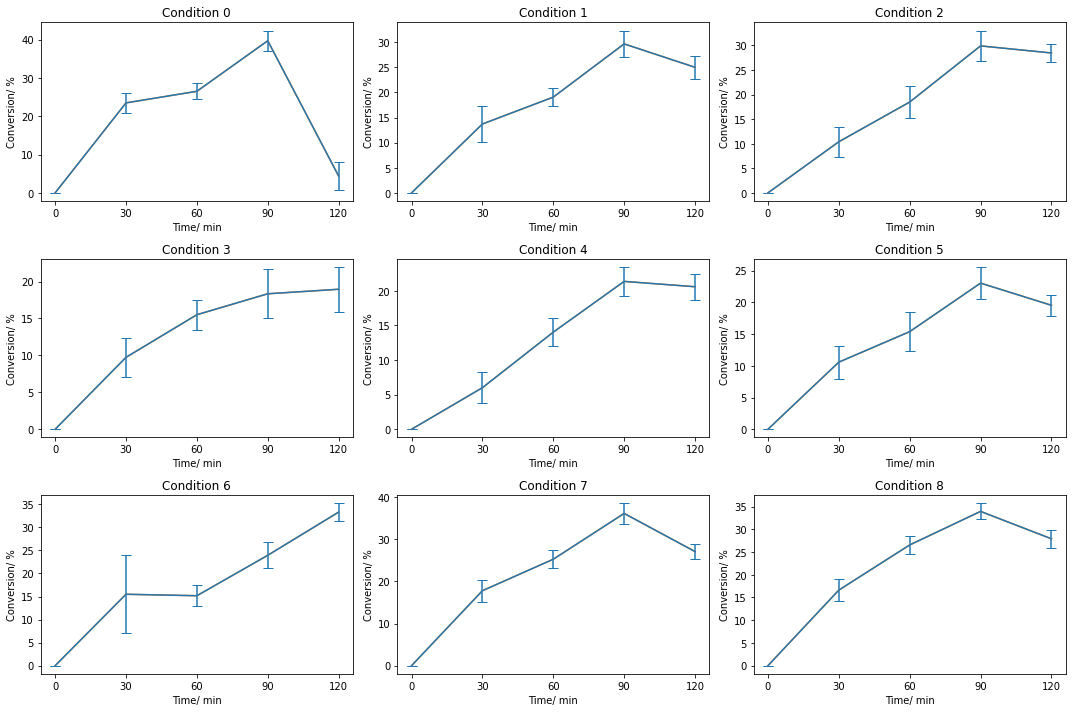

In [18]:
plt.figure(figsize=(15, 10))

for index, rows in df_conversion.iterrows():
    
    x = df_conversion.columns[1:] # Ignore Condition column during plotting
    
    y = rows[1:] # Ignore Condition column during plotting
    
    plt.subplot(3, 3, (1+index))
    
    plt.title('Condition ' + str(index))
    # np.round up to 1 d.p. for slug identity, then convert to string.
    
    plt.xlabel('Time/ min')

    plt.ylabel('Conversion/ %')
    
    plt.xticks([0,30,60,90,120]) # Set xticks to relevant time intervals.
    
    plt.errorbar(x, y, error_dict['c'+str(index+1)+'_error'], capsize = 5)
    
    plt.plot(x, y)
    
plt.tight_layout()
plt.show()

In [19]:
df_conversion.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210524 Baseline Correction and Peak Height Raman Data\C1, C19 and C10 Repeat\df_conversion.csv', index=False)

In [20]:
df_error.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210524 Baseline Correction and Peak Height Raman Data\C1, C19 and C10 Repeat\df_error.csv', index=False)